# Classificação de Flores Iris

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas específicas para o projeto de classificação
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

#### Carregando a base de dados e verificando primeiras informações

In [2]:
# Carregando o conjunto de dados sobre as flores iris.
iris_data = load_iris()

# Criando um DataFrame a partir do conjunto de dados.
# Os dados de características das flores estão em iris_data.data e as classes em iris_data.target .
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target

# Função auxiliar para imprimir separadores visuais no output.
def print_separator():
    print('\n\n'+ '#'*40 +'\n\n') 

# Verificando algumas informações sobre o conjunto de dados.
print(df.info()) # Exibe informações sobre o DataFrame, como quantidade de colunas, tipos de dados e valores não nulos.
print_separator()
print(df.head()) # Exibe as 5 primeiras linhas do DataFrame para visualizar os dados.
print_separator()
print(df['target'].value_counts()) # Exibe a contagem de cada classe no conjunto de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


########################################


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4        

#### Visualização dos dados graficamente

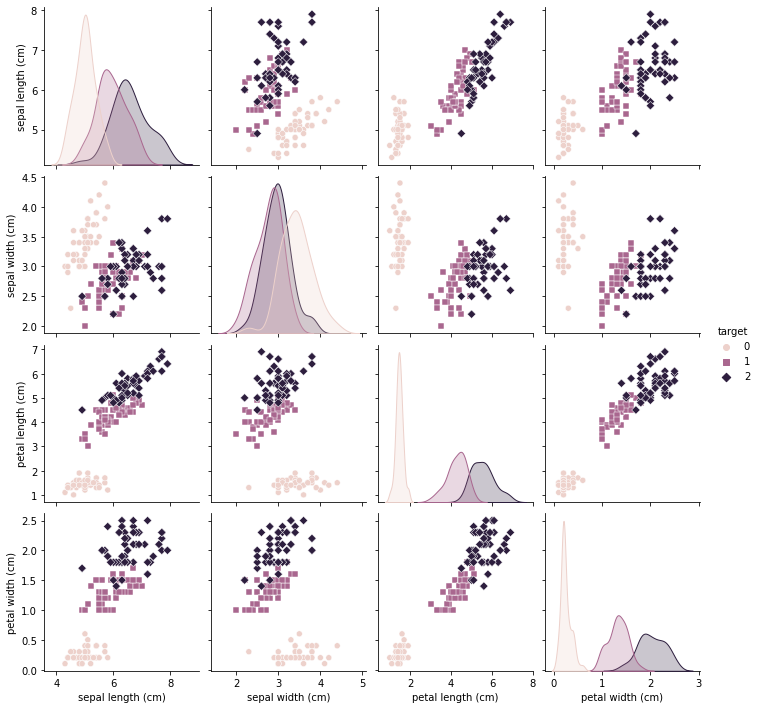

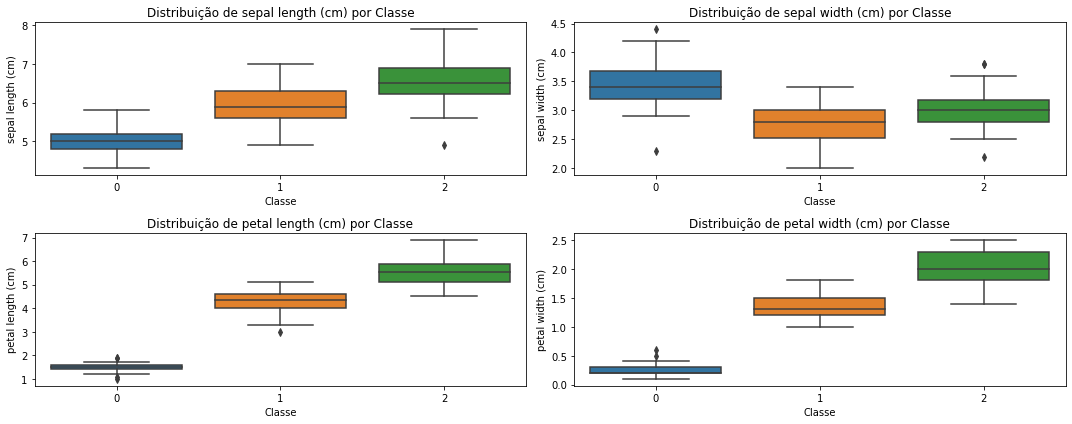

In [3]:
# Gráfico de dispersão diferenciando as classes.
# Este método cria uma matriz de gráficos de dispersão para todas as combinações de características.
# O parâmetro hue='target' é utilizado para diferenciar as classes de flores por cores.
# Os marcadores 'o', 's', 'D' representam cada classe, sendo: círculo, quadrado e diamante, respectivamente.
sns.pairplot(df, hue='target', markers=['o', 's', 'D'])
plt.show()

# Box plot para entender a distribuição das características por classe.
plt.figure(figsize=(15,6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Distribuição de {feature} por Classe')
    plt.xlabel('Classe')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

#### Preparação dos dados para serem treinados

In [4]:
# Separando os atributos (X) e classes (y).
X = df.drop('target', axis=1) # Contém todas as colunas do DataFrame, exceto 'target'.
y = df['target'] # Contém a coluna 'target', que são as classes a serem previstas.

In [5]:
# Codificando os rótulos numéricos usando LabelEncoder.
# O LabelEncoder é usado para transformar as classes em valores numéricos (0,1,2).
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [6]:
# Separando o conjunto de dados para treinamento e teste (80% para treino e 20% para teste).
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#### Treinamento dos dados

In [7]:
# Criação do modelo RandomForestClassifier com random_state=42 para reprodutibilidade.
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Avaliação do modelo

Acurácia: 1.00


########################################


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



########################################




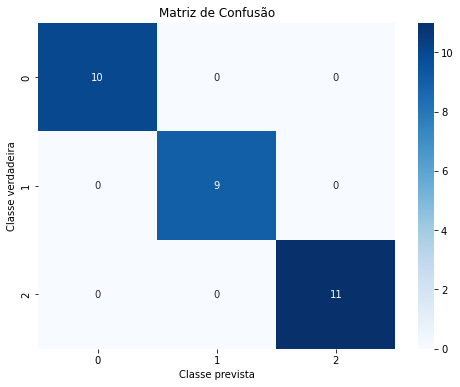

In [8]:
# Prevendo as classes no conjunto de teste usando o modelo treinado.
y_pred = rf_classifier.predict(X_test)

# Avaliação do desempenho do modelo.
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibe a acurácia do modelo.
print(f'Acurácia: {accuracy:.2f}')
print_separator()
# Exibe o relatório de classificação com métricas como precisão, recall, entre outras.
print(f'Relatório de Classificação:')
print(classification_report_str)
print_separator()

# Gráfico matriz de confusão usando seaborn heatmap.
plt.figure(figsize=(8,6))
# annot = True para exibir os valores dentro das células do heatmap. 
# fmt='d' indica o formato dos valores sendo inteiros. 
# cmap='Blue' define o esquema de cores do heatmap.
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Classe prevista")
plt.ylabel("Classe verdadeira")
plt.title("Matriz de Confusão")
plt.show()